## Esercizio 2

### Exercise 02.1
<span style="color:blue">
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

La densità di probabilità scelta per migliorare $I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$ è $d(x) = 2(1-x)$. La funzione che permette di generare numeri casuali secondo la distribuzione scelta è stato implementato nel codice C++ con il metodo della classe Random  "d_lin()"

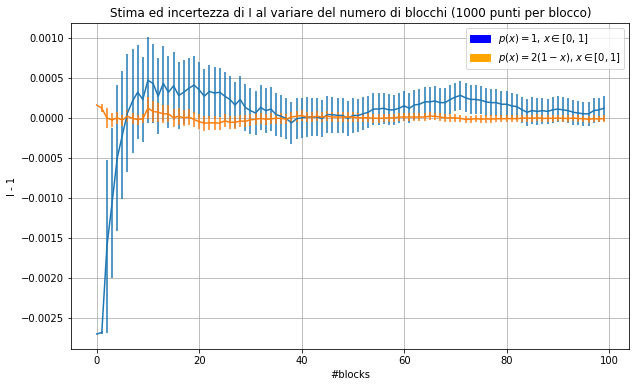

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

file=open("2_1/es2_1_random.txt")
sum=0
for line in file:
    sum+=1
file.close()

mean, error = np.loadtxt("2_1/es2_1_random.txt", usecols=(0,1), unpack='true')
mean2, error2 = np.loadtxt("2_1/es2_1_dlin.txt", usecols=(0,1), unpack='true')


plt.figure(figsize=(10,6))

x=np.arange(sum)
plt.errorbar(x,mean-1,yerr=error)
plt.errorbar(x,mean2-1,yerr=error2)

plt.xlabel('#blocks')
plt.ylabel('I - 1')
plt.title("Stima ed incertezza di I al variare del numero di blocchi (1000 punti per blocco)")
plt.grid(True)
blue_patch = mpatches.Patch(color='blue', label='$p(x) = 1$, $x\in[0,1]$')
orange_patch = mpatches.Patch(color='orange', label='$p(x) = 2(1-x)$, $x\in[0,1]$')
plt.legend(handles=[blue_patch,orange_patch])
plt.show()

### Exercise 02.2
<span style="color:blue">
3D Random Walks (RW) on a cubic lattice and in the continuum:
    
Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.
Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?</span> 

[0.92190766]


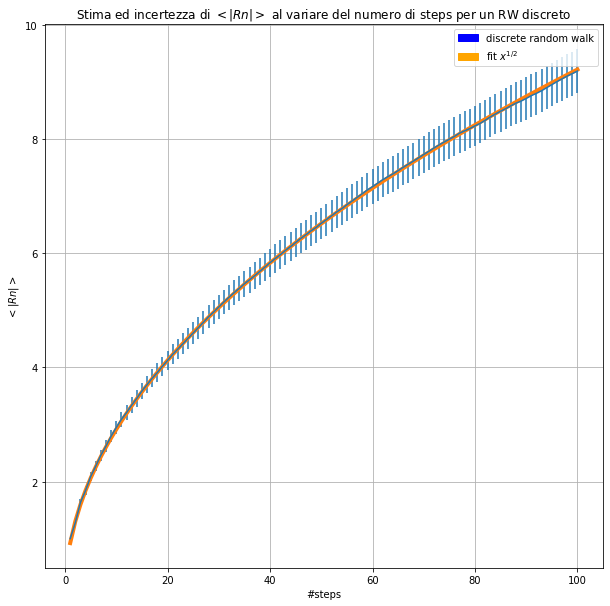

In [24]:
import math
from scipy.optimize import curve_fit
from scipy import stats

def root(x, k):             # definisco la funzione y=k*(x)^(1/2) per poi eseguire il fit sui dati
    return (k*np.sqrt(x))

# analisi dati dei random walk discreti

file=open("2_2/es2_2_discrete.txt")
sum=0
for line in file:
    sum+=1
file.close()
mean, error = np.loadtxt("2_2/es2_2_discrete.txt", usecols=(0,1), unpack='true')

plt.figure(figsize=(10,10))
x=np.arange(sum)+1
plt.errorbar(x,mean,yerr=error)
plt.title("Stima ed incertezza di $<|Rn|>$ al variare del numero di steps per un RW discreto ")
plt.xlabel('#steps')
plt.ylabel('$<|Rn|>$')
plt.grid(True)

# eseguo il fit sui dati
opt, cov = curve_fit(root, xdata=x, ydata=mean)
y_fit = root(x,opt)
plt.plot(x,y_fit, linewidth=4)
print(opt)

blue_patch = mpatches.Patch(color='blue', label='discrete random walk')
orange_patch = mpatches.Patch(color='orange', label='fit $x^{1/2}$')
plt.legend(handles=[blue_patch,orange_patch])
plt.show()

[0.91943257]


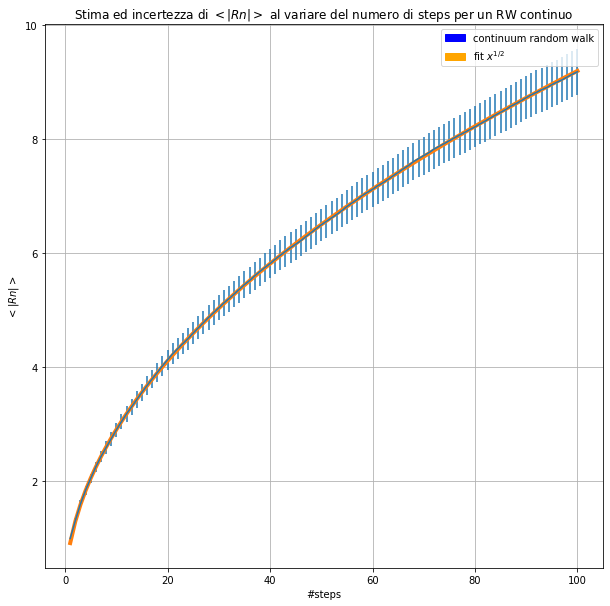

In [25]:
# analisi dati dei random walk discreti

file=open("2_2/es2_2_continuum.txt")
sum=0
for line in file:
    sum+=1
file.close()
mean, error = np.loadtxt("2_2/es2_2_continuum.txt", usecols=(0,1), unpack='true')

plt.figure(figsize=(10,10))
x=np.arange(sum)+1
plt.errorbar(x,mean,yerr=error)
plt.xlabel('#steps')
plt.title("Stima ed incertezza di $<|Rn|>$ al variare del numero di steps per un RW continuo ")
plt.ylabel('$<|Rn|>$')
plt.grid(True)

# esegui il fit sui dati
opt, cov = curve_fit(root, xdata=x, ydata=mean)
y_fit = root(x,opt)
plt.plot(x,y_fit, linewidth=4)
print(opt)

blue_patch = mpatches.Patch(color='blue', label='continuum random walk')
orange_patch = mpatches.Patch(color='orange', label='fit $x^{1/2}$')
plt.legend(handles=[blue_patch,orange_patch])
plt.show()

Come si può notare dai grafici, la funzione $Y=k\sqrt{X}$ interpola perfettamente i valori di Rn, ovvero il valor medio del modulo della distanza compiuta nel random walk all'aumentare degli step. Poichè, dato un processo diffusivo dipendente da t, il valor medio $\langle X(t)\rangle$ è pari alla radice di t moltiplicato per un coefficiente di diffusione, possiamo affermare che il processo in questione è diffusivo